In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Importing and exploring Dataset

In [5]:
df = pd.read_csv("../dataset/water_dataX.csv", encoding = 'unicode_escape')
df = df.iloc[0:1900,:]

In [6]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [7]:
value_counts = df['year'].value_counts()
print(value_counts)

year
2012    292
2013    261
2014    245
2011    231
2010    188
2009    181
2008    159
2007    120
2005    118
2006    105
Name: count, dtype: int64


In [8]:
df.describe()

,year
count,1900.000000
mean,2010.373158
std,2.708444
min,2005.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [9]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

# Cleaning Dataset

In [10]:
# Converting data type to numeric
for column in df.iloc[:,3:11].columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [11]:
# Replacing "NAN" values with np.nan
df.replace('NAN', np.nan, inplace = True)

In [12]:
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [13]:
# Checking for nan values in each column
df.isnull().sum()

STATION CODE                        120
LOCATIONS                           183
STATE                               670
Temp                                 89
D.O. (mg/l)                          30
PH                                    7
CONDUCTIVITY (µmhos/cm)              24
B.O.D. (mg/l)                        42
NITRATENAN N+ NITRITENANN (mg/l)    189
FECAL COLIFORM (MPN/100ml)          280
TOTAL COLIFORM (MPN/100ml)Mean      130
year                                  0
dtype: int64

In [14]:
# Replacing numerical missing values
df.fillna(df.median(numeric_only = True), inplace=True)

In [15]:
# Checking for outliers
z_scores = df.iloc[:,3:].apply(zscore)
outliers_count = (z_scores.abs() > 3).sum()
df_outliers = np.where(np.abs(z_scores) > 3)[0]
print(outliers_count)

Temp                                15
D.O. (mg/l)                         42
PH                                  14
CONDUCTIVITY (µmhos/cm)             57
B.O.D. (mg/l)                       20
NITRATENAN N+ NITRITENANN (mg/l)    40
FECAL COLIFORM (MPN/100ml)           3
TOTAL COLIFORM (MPN/100ml)Mean       3
year                                 0
dtype: int64


In [16]:
df.iloc[df_outliers]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
22,3183,"RIVER SAL AT KHAREBAND, MARGAO",GOA,28.3,2.2,6.50,322.0,4.700,1.200,11210.0,14920.0,2014
37,2671,KUNDALIKA RIVER NEAR SALAV BRIDGE (SALINA ZONE...,MAHARASHTRA,25.3,5.3,7.70,24062.0,9.900,1.200,156.0,304.0,2014
85,2337,R KADAMBAYAR AT BRAHMAPURAM,KERALA,28.7,2.1,6.80,101.0,1.600,0.800,431.0,694.0,2014
88,2294,R KALLAI AT KALLAI BRIDGE,KERALA,26.3,3.7,7.70,32005.0,1.200,0.900,40000.0,60392.0,2014
92,1155,"KARAMANA AT MOONNATTUMUKKU, KERALA",KERALA,25.5,1.9,7.70,2941.0,26.900,2.800,10875.0,37375.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1858,NaN,"MYNTDU RIVER JOWAI, MEGHALAYA",NaN,15.0,7.1,7.03,147.3,2.100,1.000,1675.0,2300.0,2005
1866,NaN,"RUSHIKULYA AT GANJAM D/S, ORISSA",NaN,30.0,7.5,7.35,30683.0,2.250,0.745,1515.0,2145.0,2005
1883,NaN,GHAGGAR BEFORE OTTU WEIR (BEFORE MIXING OF SAT...,NaN,16.0,6.2,7.63,423.3,7.000,14.013,233.0,43.0,2005
1883,NaN,GHAGGAR BEFORE OTTU WEIR (BEFORE MIXING OF SAT...,NaN,16.0,6.2,7.63,423.3,7.000,14.013,233.0,43.0,2005


In [17]:
# removing outlliers
df_filtered = df.drop(df.index[df_outliers])

In [18]:
df_filtered

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.50,203.0,1.8965,0.100,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.20,189.0,2.0000,0.200,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.90,179.0,1.7000,0.100,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.90,64.0,3.8000,0.500,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.30,83.0,1.9000,0.400,3428.0,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1895,NaN,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NaN,27.0,7.4,7.00,88.5,0.9770,0.186,27.0,105.0,2005
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN,27.0,6.6,7.81,603.2,2.6750,0.263,40.0,191.0,2005
1897,NaN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NaN,28.0,6.6,7.49,571.5,2.0910,0.256,151.0,273.0,2005
1898,NaN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NaN,28.0,5.4,7.16,75.8,2.0920,0.520,404.0,513.0,2005


In [19]:
df_filtered['year'].value_counts()

year
2012    268
2013    244
2014    226
2011    208
2010    176
2009    158
2008    148
2007    108
2005    108
2006     89
Name: count, dtype: int64

# Adding dates to all measurements

In [20]:
# Creatinng sub-datasets for each year
df_2014 = df_filtered[df_filtered['year'] == 2014]
df_2013 = df_filtered[df_filtered['year'] == 2013]
df_2012 = df_filtered[df_filtered['year'] == 2012]

In [21]:
def remove_indexes(lst, indexes):
    return [item for index, item in enumerate(lst) if index not in indexes]

In [22]:
def assign_dates(df):
    
    import random
   
    missing_days = 336 - df.shape[0]
    year = df['year'].iloc[0]
    dates = []
    
    # calculating random indexes of days to skip
    days_to_skip = sorted(random.sample(range(0, 336), missing_days))
    
    # assigning dates
    for month in range(1, 13):
        for day in range(1,29):
            dates.append(pd.to_datetime(f'{year}-{month}-{day}'))
            
            
    # removing missing days
    dates = remove_indexes(dates, days_to_skip)
    
    
    df['date'] = dates
    return df

In [23]:
# concatenating all sub-dataframes
_df_2012 = assign_dates(df_2012)
_df_2013 = assign_dates(df_2013)
_df_2014 = assign_dates(df_2014)
df = pd.concat([_df_2012, _df_2013, _df_2014], ignore_index=True)

# saving dataset as csv
df.to_csv('indian_water_physicochemical_parameters.csv')

C:\Program Files\KMSpico\temp\ipykernel_8792\3917068669.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = dates
C:\Program Files\KMSpico\temp\ipykernel_8792\3917068669.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = dates


C:\Program Files\KMSpico\temp\ipykernel_8792\3917068669.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = dates


In [24]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,date
0,1393,DAMANGANGA AT D/S OF MADHUBAN,DAMAN & DIU,31.0,7.1,7.8,151.0,8.0,0.08,233.0,465.0,2012,2012-01-01
1,1150,DAMANGANGA AT KACHIGAON U\S AT GIDC WIER,GUJARAT,28.0,7.2,7.4,319.0,0.7,0.18,5.0,10.0,2012,2012-01-04
2,1865,RIVER DHADAR AT KOTHADA,GUJARAT,27.0,6.2,8.4,894.0,9.0,0.38,140.0,350.0,2012,2012-01-05
3,1149,KOLAK AT PATALIA BDG,GUJARAT,29.0,2.4,7.6,1500.0,6.2,1.31,3.0,13.0,2012,2012-01-06
4,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS,GOA,31.0,5.9,7.2,52.0,2.1,0.08,233.0,90.0,2012,2012-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,2052,TUIRIAL UPPER CATCHMENT,MIZORAM,23.6,6.9,7.1,186.0,1.6,0.10,233.0,29.0,2014,2014-12-22
734,2053,TUIRIAL LOWER CATCHMENT,MIZORAM,23.5,6.8,7.1,201.0,1.4,0.20,233.0,86.0,2014,2014-12-24
735,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,27.3,6.2,7.8,165.0,2.1,0.00,282.0,340.0,2014,2014-12-25
736,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,29.1,6.4,7.8,158.0,4.1,0.50,458.0,500.0,2014,2014-12-26


# Ploting pH time series

In [25]:
# setting the date as dataframe indexes
df.set_index('date', inplace = True)

# saving version with date indexes as csv
df.to_csv('indian_water_physicochemical_parameters_alt.csv')

### Plotting values by year

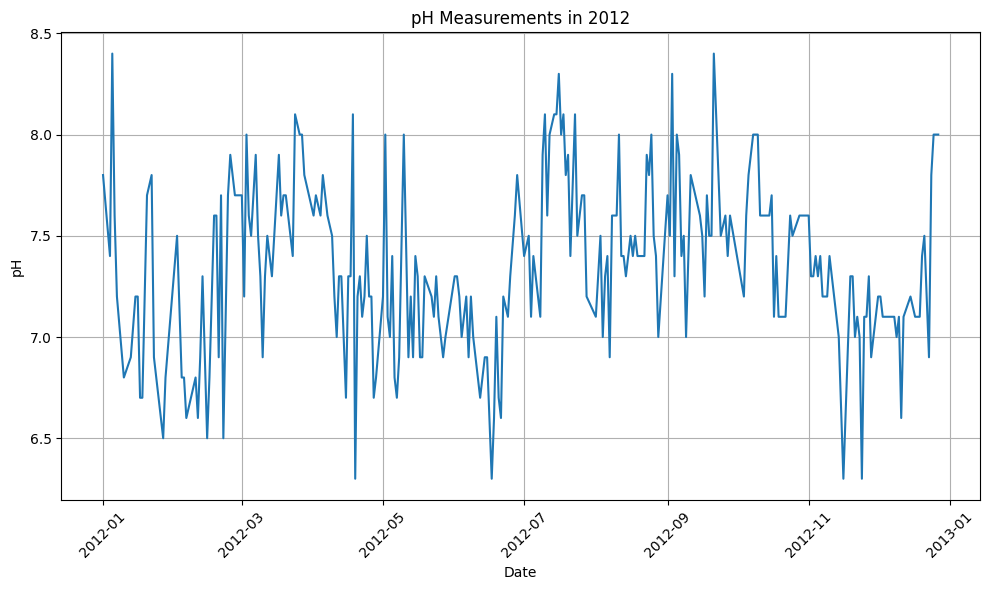

In [26]:
# plotting by year

import matplotlib.pyplot as plt


_2012_measurements = df[df.index.year == 2012]

plt.figure(figsize=(10, 6))
plt.plot(_2012_measurements.index, _2012_measurements['PH'], linestyle='-')
plt.title('pH Measurements in 2012')
plt.xlabel('Date')
plt.ylabel('pH')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

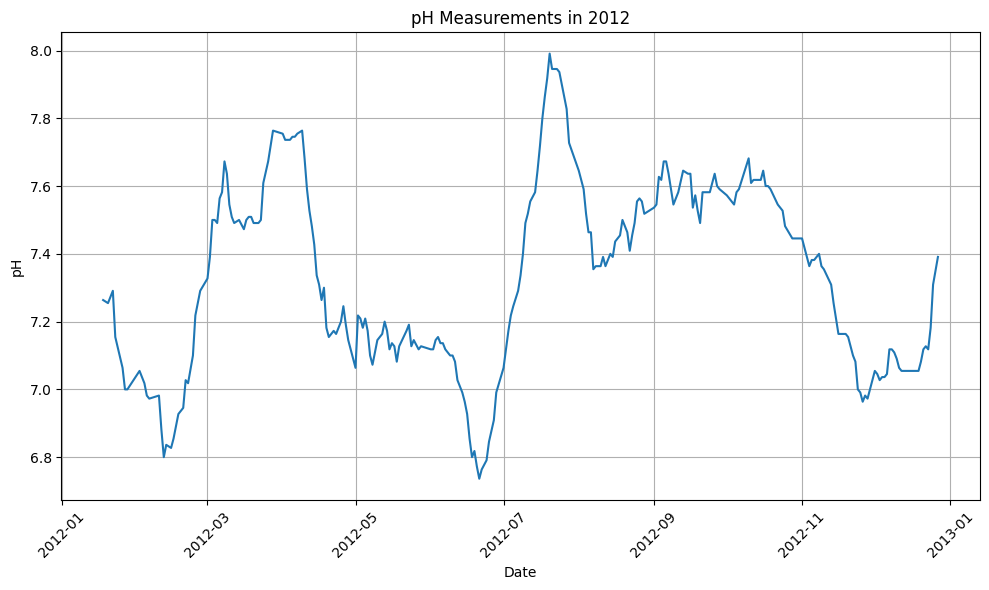

In [27]:
# plotting by year, smooth
_2012_measurements = df[df.index.year == 2012]

plt.figure(figsize=(10, 6))
plt.plot(_2012_measurements.index, _2012_measurements['PH'].rolling(window=11).mean(), linestyle='-')
plt.title('pH Measurements in 2012')
plt.xlabel('Date')
plt.ylabel('pH')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plotting values by month

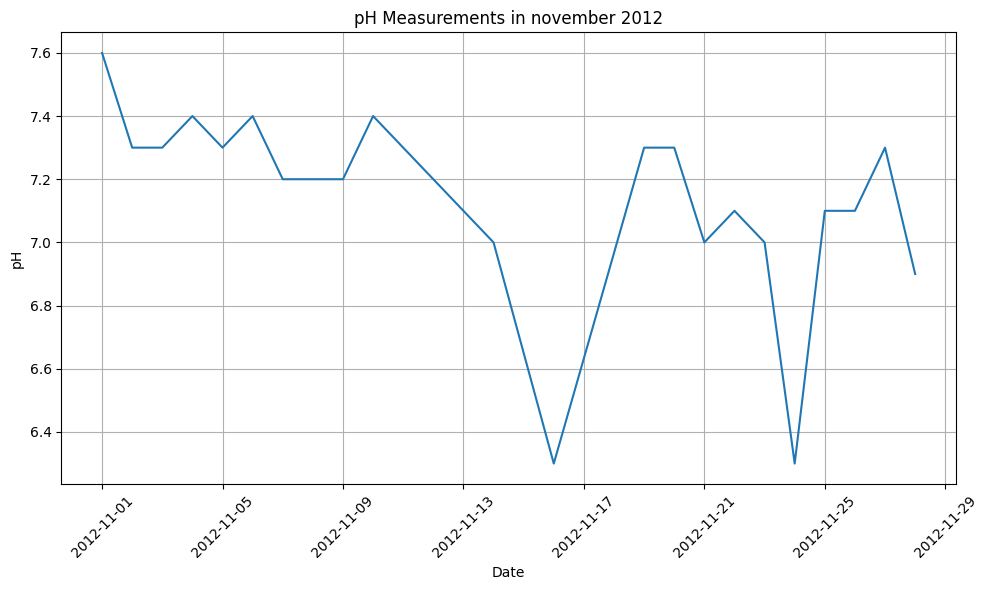

In [28]:
# plotting by month

_2012_november_measurements = df[(df.index.year == 2012) & (df.index.month==11)]

plt.figure(figsize=(10, 6))
plt.plot(_2012_november_measurements.index, _2012_november_measurements['PH'], linestyle='-')
plt.title('pH Measurements in november 2012')
plt.xlabel('Date')
plt.ylabel('pH')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Plotting a specific time frame

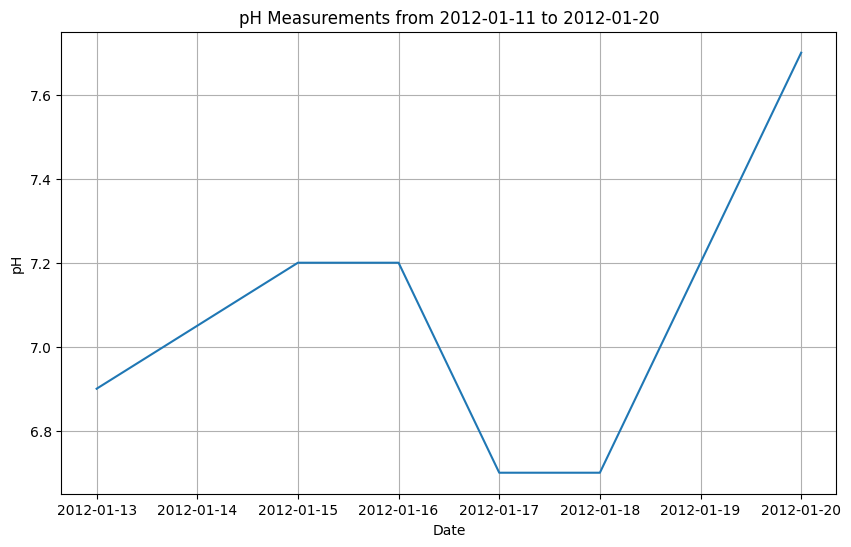

In [29]:
# ploting a specific time frame

# Define the specific time frame
start_date = '2012-01-11'
end_date = '2012-01-20'

# Filter the DataFrame to include only the specified time frame
specific_time_frame_data = df[(df.index >= start_date) & (df.index <= end_date)]

# Plot the time series of pH measurements for the specific time frame
plt.figure(figsize=(10, 6))
plt.plot(specific_time_frame_data.index, specific_time_frame_data['PH'], linestyle='-')
plt.title('pH Measurements from 2012-01-11 to 2012-01-20')
plt.xlabel('Date')
plt.ylabel('pH')
plt.grid(True)
plt.show()